In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set figure size and style
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="darkgrid")

In [3]:
# Read the data
sales_df = pd.read_csv('store_sales.csv', parse_dates=['date'], dayfirst=True)

# Data Exploration

In [4]:
# Print the first five rows
sales_df.head(5)

,id_number,date,retailer,region,state,product,sales_method,price_per_unit,units_sold
0,1185732,2021-01-01,Foot Locker,Northeast,New York,Nike Shoes,In-store,50,1200
1,1185732,2021-01-02,Foot Locker,Northeast,New York,Adidas Shoes,In-store,50,1000
2,1185732,2021-01-03,Foot Locker,Northeast,New York,Puma Shoes,In-store,40,1000
3,1185732,2021-01-04,Foot Locker,Northeast,New York,Asics Shoes,In-store,45,850
4,1185732,2021-01-05,Foot Locker,Northeast,New York,New Balance Shoes,In-store,60,900


In [5]:
# Print the last five rows
sales_df.tail(5)

,id_number,date,retailer,region,state,product,sales_method,price_per_unit,units_sold
9634,1185732,2022-12-17,Foot Locker,Northeast,New Hampshire,Adidas Shoes,Outlet,49,128
9635,1185732,2022-12-17,Foot Locker,Northeast,New Hampshire,Puma Shoes,Outlet,47,128
9636,1185732,2022-12-17,Foot Locker,Northeast,New Hampshire,Asics Shoes,Outlet,49,116
9637,1185732,2022-12-17,Foot Locker,Northeast,New Hampshire,New Balance Shoes,Outlet,50,123
9638,1185732,2022-12-17,Foot Locker,Northeast,New Hampshire,Salomon Shoes,Outlet,61,144


In [6]:
# Get the number of rows and columns
sales_df.shape

(9639, 9)

In [7]:
# Get the columns names
sales_df.columns

Index(['id_number', 'date', 'retailer', 'region', 'state', 'product',
       'sales_method', 'price_per_unit', 'units_sold'],
      dtype='object')

In [8]:
# Get the information about the entire dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9639 entries, 0 to 9638
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_number       9639 non-null   int64         
 1   date            9639 non-null   datetime64[ns]
 2   retailer        9639 non-null   object        
 3   region          9639 non-null   object        
 4   state           9639 non-null   object        
 5   product         9639 non-null   object        
 6   sales_method    9639 non-null   object        
 7   price_per_unit  9639 non-null   int64         
 8   units_sold      9639 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 677.9+ KB


In [9]:
# Check for missing values
sales_df.isnull().sum()

id_number         0
date              0
retailer          0
region            0
state             0
product           0
sales_method      0
price_per_unit    0
units_sold        0
dtype: int64

In [10]:
# Extract year, month, and week from date 
sales_df['year'] = pd.to_datetime(sales_df['date']).dt.year
sales_df['month_name'] = pd.to_datetime(sales_df['date']).dt.month_name()
sales_df['week_name'] = pd.to_datetime(sales_df['date']).dt.strftime('%A')

In [11]:
sales_df.head(1)

,id_number,date,retailer,region,state,product,sales_method,price_per_unit,units_sold,year,month_name,week_name
0,1185732,2021-01-01,Foot Locker,Northeast,New York,Nike Shoes,In-store,50,1200,2021,January,Friday


In [12]:
# Date range
sales_df['year'].unique()

array([2021, 2022], dtype=int64)

In [13]:
# Month range
sales_df['month_name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'July', 'August',
       'September', 'October', 'November', 'December', 'June'],
      dtype=object)

In [14]:
# Check for duplicates values
sales_df.duplicated().sum()

0

In [15]:
# Print basic summary statistics about the data
sales_df[['price_per_unit','units_sold']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price_per_unit,9639.0,45.22,14.71,7.0,35.0,45.0,55.0,110.0
units_sold,9639.0,257.08,214.30,0.0,106.5,176.0,350.0,1275.0


In [16]:
# Print out the basic summary statistics of object data type in the data frame.
sales_df.describe(include='object')

,retailer,region,state,product,sales_method,month_name,week_name
count,9639,9639,9639,9639,9639,9639,9639
unique,6,5,50,6,3,12,7
top,Foot Locker,West,California,Nike Shoes,Online,January,Wednesday
freq,2628,2448,432,1608,4889,855,1490


In [17]:
# Get the unique retailer names from the data
sales_df['retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [18]:
# Get the unique region names from the data
sales_df['region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [19]:
# Print the unique sales_method names from the data
sales_df['sales_method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [20]:
# Print the unique state names from the data
sales_df['state'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

In [21]:
# Print the unique product names from the data
sales_df['product'].unique()

array(['Nike Shoes', 'Adidas Shoes', 'Puma Shoes', 'Asics Shoes',
       'New Balance Shoes', 'Salomon Shoes'], dtype=object)

### Basic information about the dataset so far
+ There is 9639 rows and 8 columns in the dataset.
+ No missing values.
+ No duplicates.
+ Two year monthly data- 2021 and 2022
+ The average price per unit sold is approximately $45.22.
+ The maximum price per unit sold is $110.0.
+ The minimum price per unit sold is $7.0.
+ The average number of units sold is approximately 257.08 units.
+ The maximum number of units sold is 1275.0 units.
+ The minimum number of units sold is 0.0 units.
+ There are 6 different retailers.
+ There are 5 distinct regions.
+ There are 3 distinct sales methods used.
+ There are 50 distinct states.
+ There are 6 different products being sold.

In [22]:
# Create a new column 'sales'
sales_df['sales'] = sales_df['price_per_unit'] * sales_df['units_sold']

In [23]:
# Calculate metrics for sales
sales_total = sales_df['sales'].sum()
sales_avg = round(sales_df['sales'].mean())
sales_max = sales_df['sales'].max()
sales_min = sales_df['sales'].min()

print('Total Sales: $', sales_total)
print('Average Sales: $', sales_avg)
print('Maximum Sales: $', sales_max)
print('Minimum Sales: $', sales_min)

Total Sales: $ 120131818
Average Sales: $ 12463
Maximum Sales: $ 82500
Minimum Sales: $ 0


In [24]:
# Find minimum value in the 'sales' column
sales_df[sales_df['sales'] == sales_df['sales'].min()]

,id_number,date,retailer,region,state,product,sales_method,price_per_unit,units_sold,year,month_name,week_name,sales
1019,1185732,2022-06-05,Foot Locker,Midwest,Nebraska,Asics Shoes,Outlet,35,0,2022,June,Sunday,0
1025,1185732,2022-06-11,Foot Locker,Midwest,Nebraska,Asics Shoes,Outlet,30,0,2022,June,Saturday,0
4907,1185732,2022-06-05,Foot Locker,Midwest,Nebraska,Asics Shoes,Online,33,0,2022,June,Sunday,0
4913,1185732,2022-06-11,Foot Locker,Midwest,Nebraska,Asics Shoes,Online,27,0,2022,June,Saturday,0


In [25]:
# Find maximum value in the 'sales' column
sales_df[sales_df['sales'] == sales_df['sales'].max()]

,id_number,date,retailer,region,state,product,sales_method,price_per_unit,units_sold,year,month_name,week_name,sales
1394,1128299,2022-06-17,Walmart,Southeast,Florida,Salomon Shoes,In-store,110,750,2022,June,Friday,82500
1970,1128299,2022-06-17,West Gear,South,Louisiana,Salomon Shoes,Online,110,750,2022,June,Friday,82500


### Basic information about sales
+ The total sales amount is $120,131,818.
+ The average sales amount is $12,463.
+ The maximum sales amount is $82,500.
+ The minimum sales amount is $0.

# Data Visualization

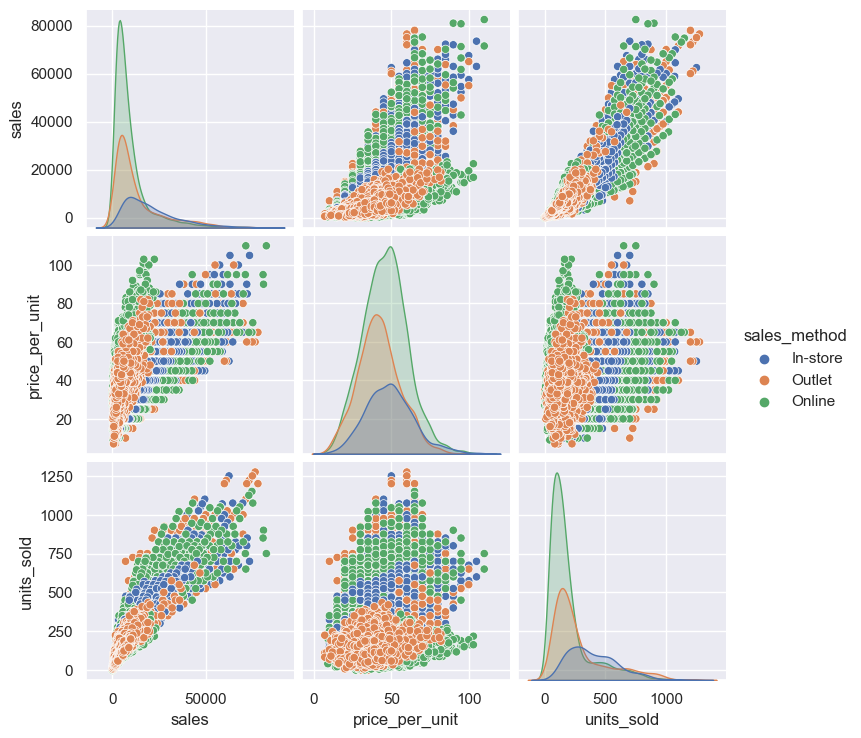

In [26]:
# Pairplot for data overview
sns.pairplot(sales_df[['sales_method','sales','price_per_unit','units_sold']], hue="sales_method")
plt.show()

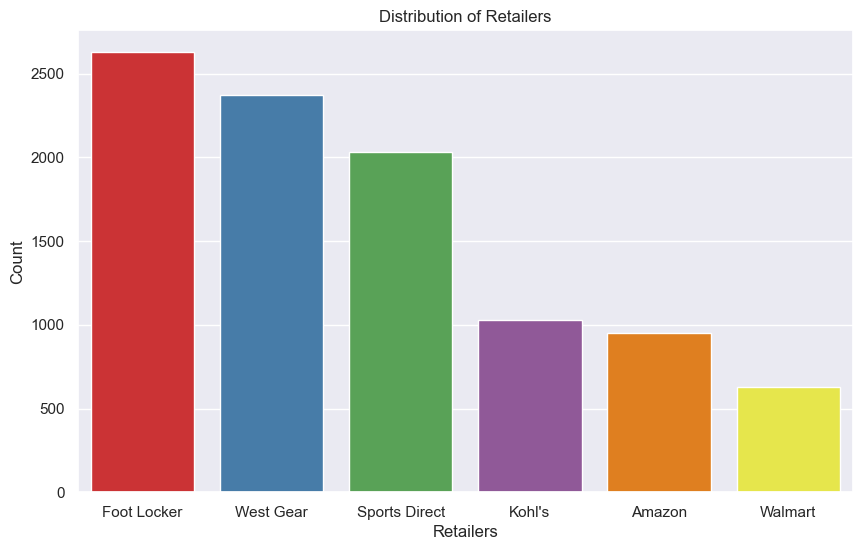

In [27]:
# Value counting on the 'retailer'
retailer_count = sales_df['retailer'].value_counts()
 
# Visualize the results
sns.barplot(x=retailer_count.index, y=retailer_count, palette='Set1')
plt.ylabel("Count")
plt.xlabel("Retailers")
plt.title("Distribution of Retailers")
plt.show()

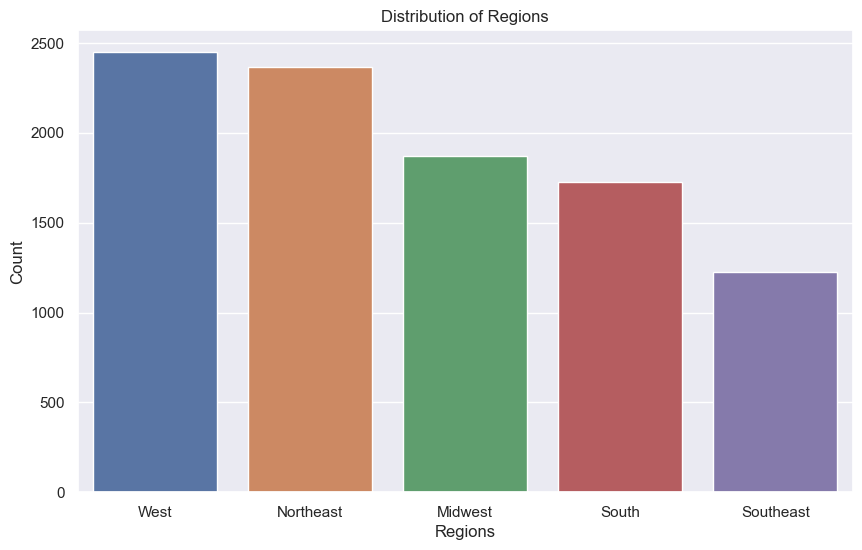

In [28]:
# Value counting on the 'region'
region_count = sales_df['region'].value_counts()
sns.barplot(x=region_count.index, y=region_count)
plt.xlabel("Regions")
plt.ylabel("Count")
plt.title("Distribution of Regions")
plt.show()


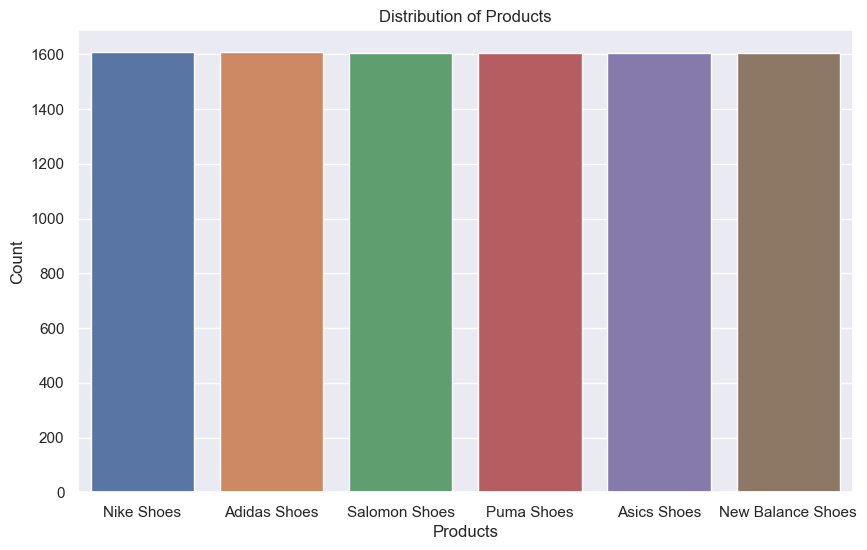

In [29]:
# Value counting on the 'product'
product_count = sales_df['product'].value_counts()

# visualize the result.
sns.barplot(x=product_count.index, y=product_count)
plt.xlabel("Products")
plt.ylabel("Count")
plt.title("Distribution of Products")
plt.show()

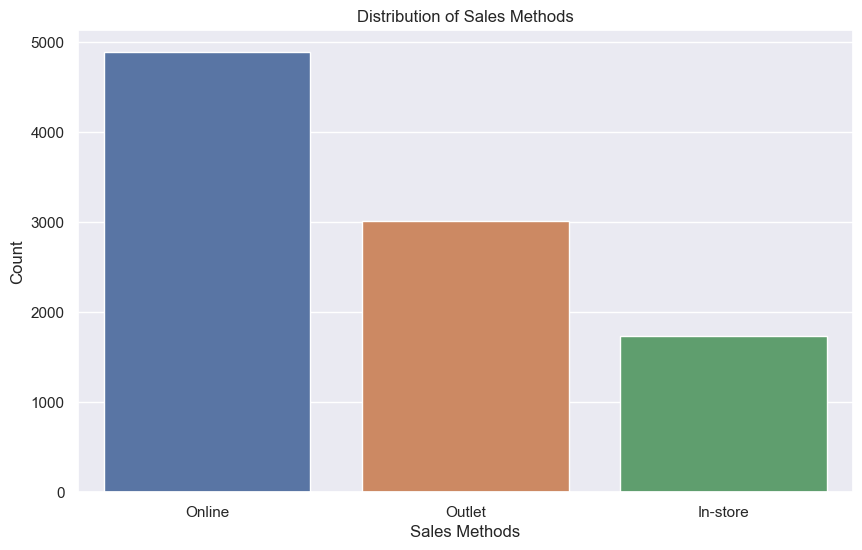

In [30]:
# Value counting on the 'sales_method'
sales_method_count = sales_df['sales_method'].value_counts()

# visualize the result.
sns.barplot(x=sales_method_count.index, y=sales_method_count)
plt.xlabel("Sales Methods")
plt.ylabel("Count")
plt.title("Distribution of Sales Methods")
plt.show()

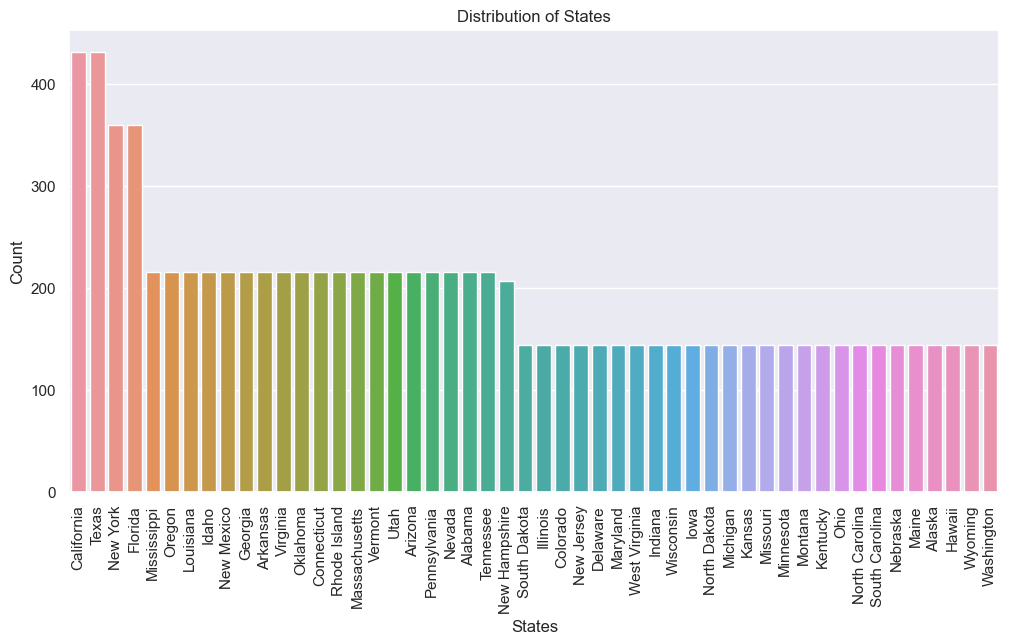

In [31]:
# Value counting on the 'state'
state_count = sales_df['state'].value_counts()

# visualize the result.
plt.figure(figsize=(12,6))
sns.barplot(x=state_count.index, y=state_count)
plt.xlabel("States")
plt.ylabel("Count")
plt.title("Distribution of States")
plt.xticks(rotation=90)
plt.show()

### Information about object types columns
+ The most frequent retailer is "Foot Locker," which appears 2628 times.
+ The most common region is "West," which occurs 2448 times.
+ The most popular product is "Nike Shoes," which appears 1608 times.
+ The most common sales method is "Online," which occurs 4889 times.
+ The most frequent state is "California," with 432 occurrences.


In [32]:
# Total sales by month
sales_month = sales_df.groupby('month_name')['sales'].sum().reset_index().sort_values('sales',ascending=False)
sales_month

,month_name,sales
5,July,12550419
1,August,12293226
2,December,11415332
8,May,10741720
11,September,10405584
6,June,9803147
4,January,9722826
0,April,9691420
9,November,9023440
10,October,8538758


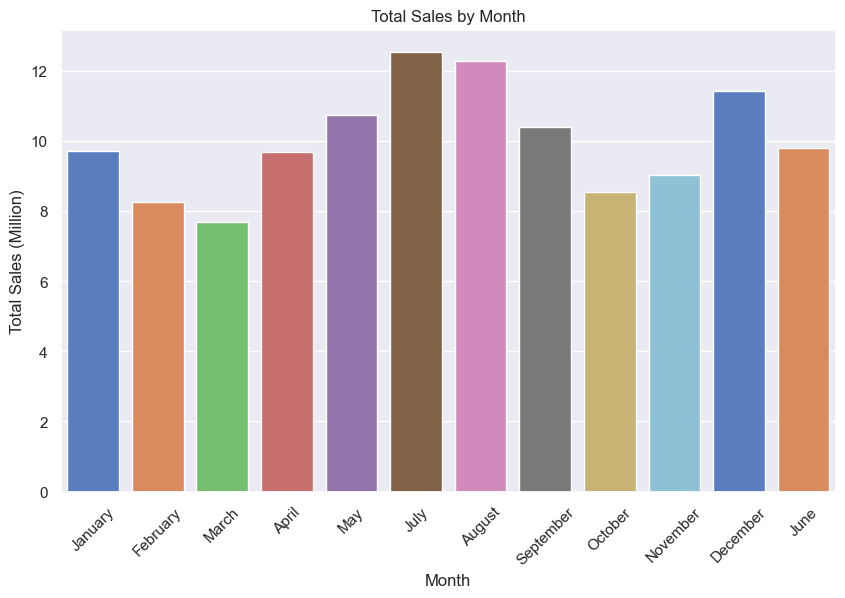

In [33]:
# Plot total sales by month
sns.barplot(x=sales_df['month_name'], y=sales_df['sales']/1000000, palette="muted", estimator='sum', errorbar=None)
plt.xlabel("Month")
plt.ylabel("Total Sales (Million)")
plt.title("Total Sales by Month")
plt.xticks(rotation=45)
plt.show()

In [34]:
# Total sales by year
sales_year = sales_df.groupby('year')['sales'].sum().reset_index().sort_values('sales',ascending=False)
sales_year

,year,sales
1,2022,95894493
0,2021,24237325


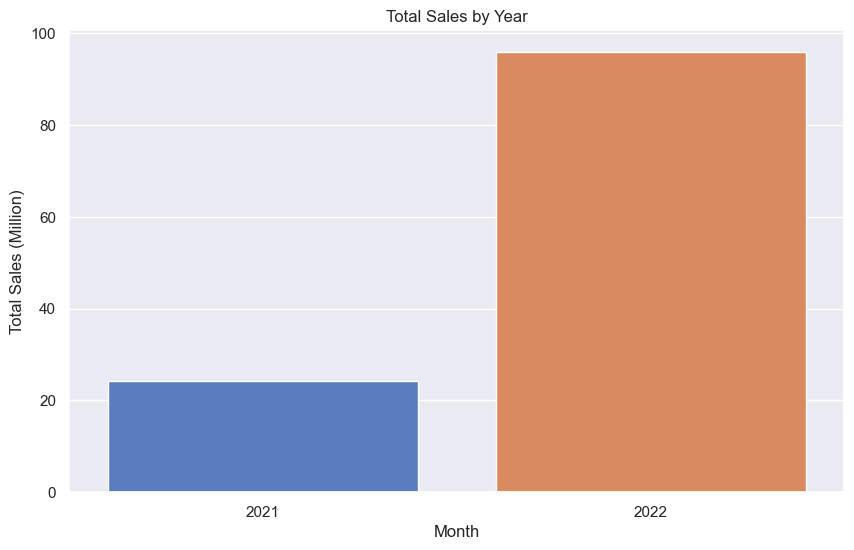

In [35]:
# Plot total sales by year
sns.barplot(x=sales_df['year'], y=sales_df['sales']/1000000,palette="muted", estimator='sum', errorbar=None)
plt.xlabel("Month")
plt.ylabel("Total Sales (Million)")
plt.title("Total Sales by Year")
plt.show()

In [36]:
# Total sales by week
sales_week = sales_df.groupby('week_name')['sales'].sum().reset_index().sort_values('sales',ascending=False)
sales_week

,week_name,sales
2,Saturday,19632222
0,Friday,19421850
6,Wednesday,18381884
1,Monday,15979856
3,Sunday,15926539
4,Thursday,15878382
5,Tuesday,14911085


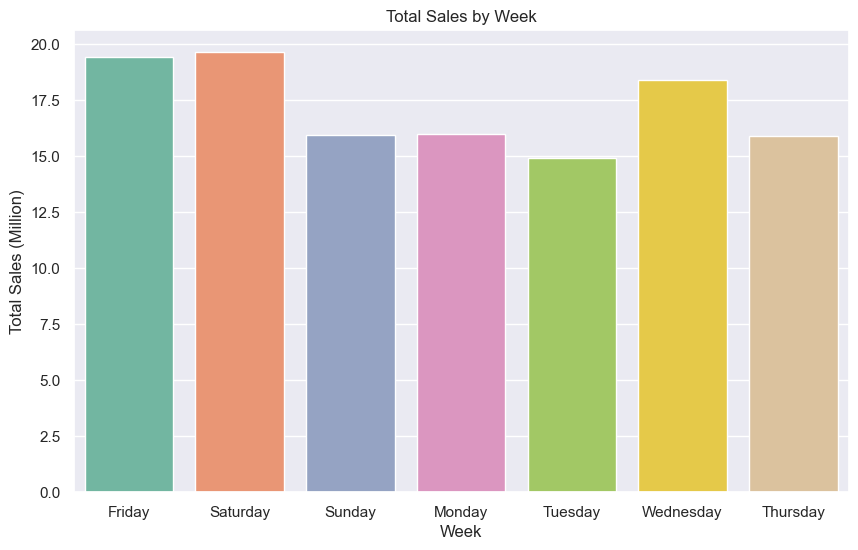

In [37]:
# Plot total sales by week
sns.barplot(x=sales_df['week_name'], y=sales_df['sales']/1000000, palette="Set2", estimator='sum', errorbar=None)
plt.xlabel("Week")
plt.ylabel("Total Sales (Million)")
plt.title("Total Sales by Week")
plt.show()

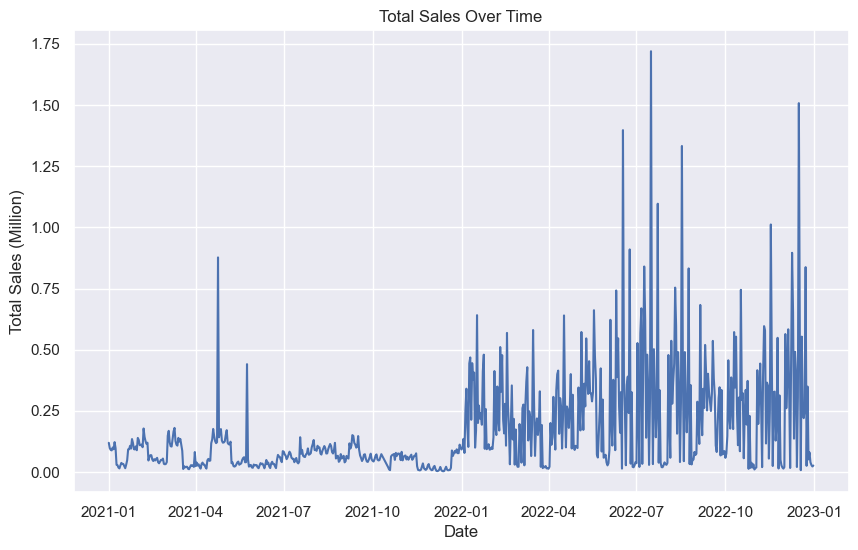

In [38]:
# Plot monthly sales
sns.lineplot(x=sales_df['date'], y=sales_df['sales']/1000000, estimator='sum', errorbar=None)
plt.xlabel("Date")
plt.ylabel("Total Sales (Million)")
plt.title("Total Sales Over Time")
plt.show()

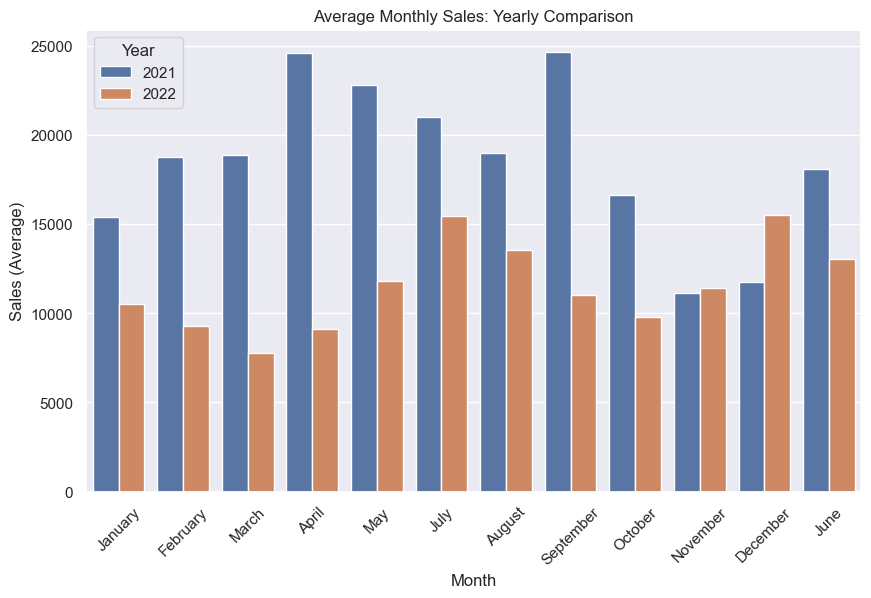

In [39]:
# Line plot with 'year' as hue
sns.barplot(x='month_name', y='sales', hue='year', data=sales_df, errorbar=None)
plt.xlabel('Month')
plt.ylabel('Sales (Average)')
plt.title('Average Monthly Sales: Yearly Comparison')
plt.xticks(rotation=45)
plt.legend(title='Year', loc=2)
plt.show()

### Sales summary
+ The month with the highest sales is July, with a total sales value of $12,550,419.
+ August comes in second place with a total sales value of $12,293,226.
+ December ranks third with total sales of $11,415,332.
+ The month with the lowest sales is March, with a total sales value of $7,694,984.
+ Saturday and Friday are the days with the highest sales, while Tuesday has the lowest sales among the weekdays
+ In the year 2022, the total sales amount is $95,894,493.
+ In the year 2021, the total sales amount is $24,237,325.
+ This data suggests that there was a significant increase in sales from 2021 to 2022, with the sales nearly quadrupling in the latter year

In [40]:
# Sales per product
sales_product = sales_df.groupby('product')['sales'].sum().reset_index().rename(columns={'sales': 'total_sales'})
sales_product.sort_values(by='total_sales', ascending=False, inplace=True)
sales_product

,product,total_sales
3,Nike Shoes,27667285
5,Salomon Shoes,23866680
0,Adidas Shoes,20570892
4,Puma Shoes,17195691
2,New Balance Shoes,16517432
1,Asics Shoes,14313838


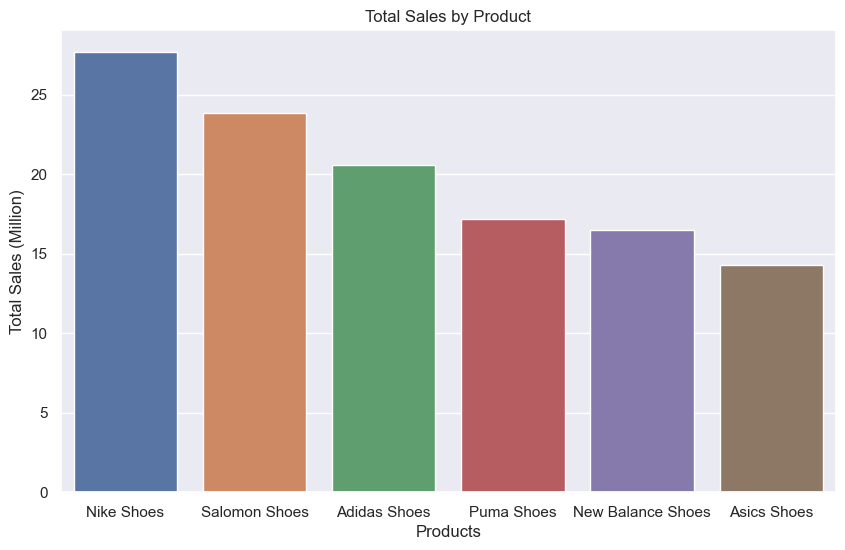

In [41]:
# Plot total sales by product
sns.barplot(x=sales_product['product'], y=sales_product['total_sales']/1000000)
plt.xlabel("Products")
plt.ylabel("Total Sales (Million)")
plt.title("Total Sales by Product")
plt.show()

+ The total sales for each product, with Nike Shoes having the highest total sales and Asics Shoes having the lowest total sales.

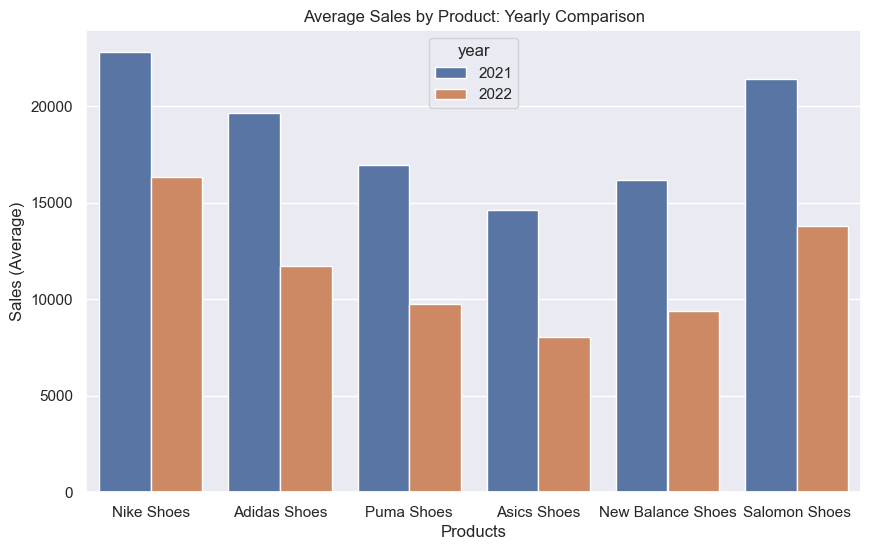

In [42]:
# Plot total sales by product
sns.barplot(x='product', y='sales', data=sales_df, hue='year', errorbar=None)
plt.xlabel("Products")
plt.ylabel("Sales (Average)")
plt.title("Average Sales by Product: Yearly Comparison")
plt.show()

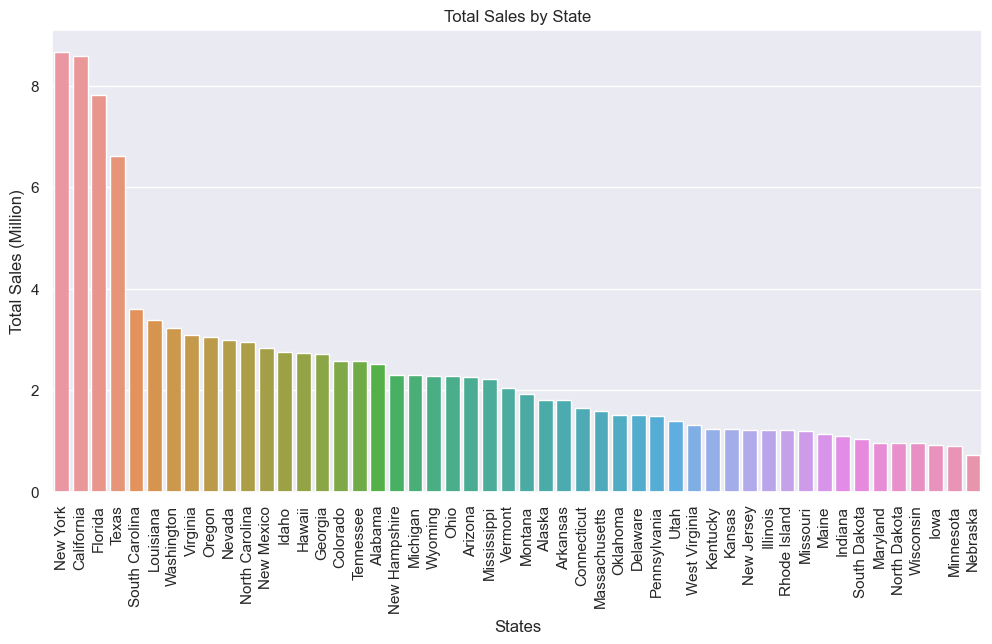

In [43]:
# Sales per state
sales_state = sales_df.groupby('state')['sales'].sum().reset_index().rename(columns={'sales': 'total_sales'})
sales_state.sort_values(by='total_sales', ascending=False, inplace=True)
sales_state

# Plot total sales by state
plt.figure(figsize=(12,6))
sns.barplot(x=sales_state['state'], y=sales_state['total_sales']/1000000)
plt.xlabel("States")
plt.ylabel("Total Sales (Million)")
plt.title("Total Sales by State")
plt.xticks(rotation=90)
plt.show()

+ The state with the highest total sales is New York, followed by California, while Nebraska has the lowest total sales among all the states.

In [44]:
# Sales per region
sales_region = sales_df.groupby('region')['sales'].sum().reset_index().rename(columns={'sales': 'total_sales'})
sales_region.sort_values(by='total_sales', ascending=False, inplace=True)
sales_region

,region,total_sales
4,West,36436157
1,Northeast,25043435
3,Southeast,21374436
2,South,20603356
0,Midwest,16674434


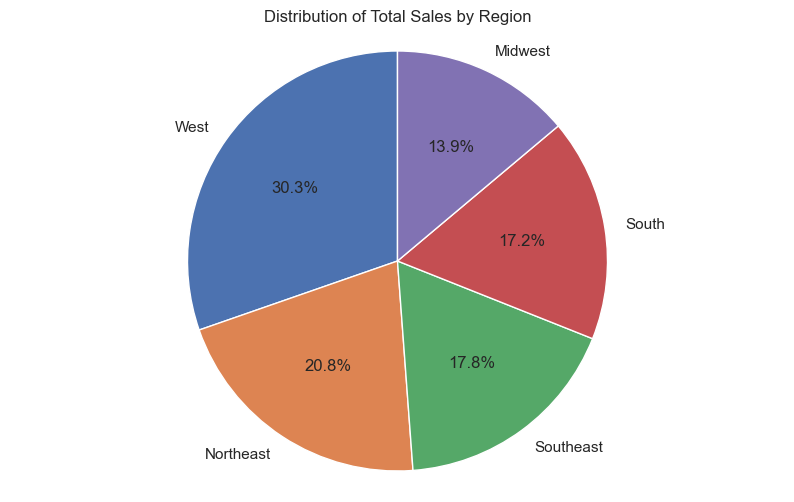

In [45]:
# Plot total sales by region
plt.pie(sales_region['total_sales'], labels=sales_region['region'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Sales by Region')
plt.axis('equal')
plt.show()

+ The "West" region has the highest total sales, accounting for approximately 30.3% of the total sales.
+ The "Northeast" region follows with approximately 20.8% of the total sales.
+ The "Southeast" region contributes around 17.8% of the total sales.
+ The "South" region accounts for approximately 17.2% of the total sales.
+ The "Midwest" region has the lowest total sales percentage, with approximately 13.9% of the total sales.

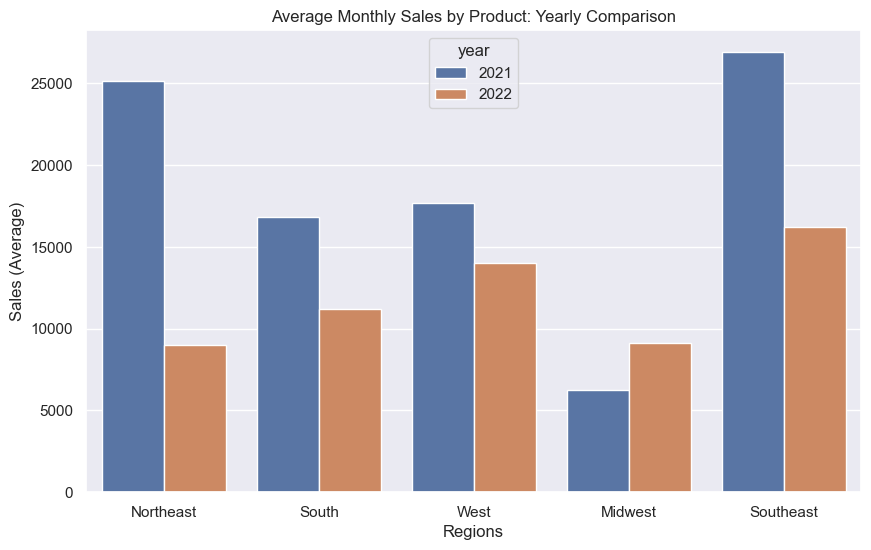

In [46]:
# Plot total sales by product
sns.barplot(x='region', y='sales', data=sales_df, hue='year', errorbar=None)
plt.xlabel("Regions")
plt.ylabel("Sales (Average)")
plt.title("Average Monthly Sales by Product: Yearly Comparison")
plt.show()

In [47]:
# Sales per sales method
sales_methods = sales_df.groupby('sales_method')['sales'].sum().reset_index().rename(columns={'sales': 'total_sales'})
sales_methods.sort_values(by='total_sales', ascending=False, inplace=True)
sales_methods

,sales_method,total_sales
1,Online,44965657
2,Outlet,39501786
0,In-store,35664375


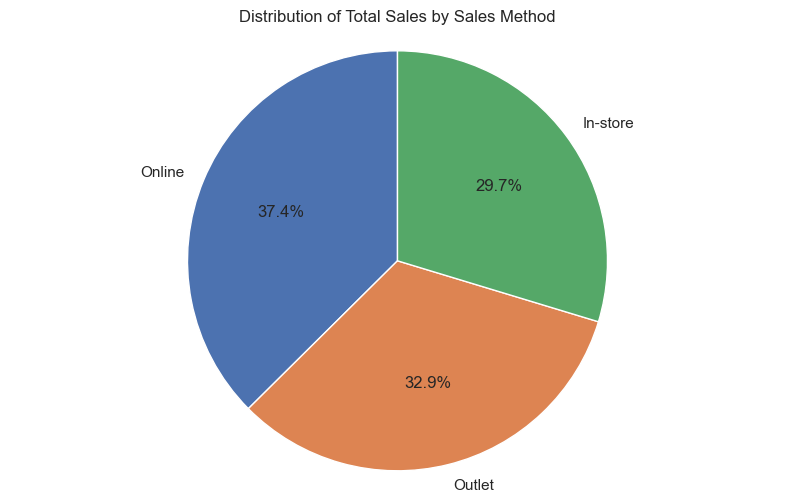

In [48]:
# Plot total sales by sales method
plt.pie(sales_methods['total_sales'], labels=sales_methods['sales_method'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Sales by Sales Method')
plt.axis('equal')
plt.show()

+ "Online" sales method accounts for the largest share of total sales, contributing approximately 37.4% of the overall sales.
+ "In-store" sales method holds the second-largest portion, representing around 32.9% of the total sales.
+ "Outlet" sales method has the smallest share, contributing about 29.7% of the total sales.

In [49]:
# Sales per retailer
sales_retailer = sales_df.groupby('retailer')['sales'].sum().reset_index().rename(columns={'sales': 'total_sales'})
sales_retailer.sort_values(by='total_sales', ascending=False, inplace=True)
sales_retailer

,retailer,total_sales
5,West Gear,32409558
1,Foot Locker,28990113
3,Sports Direct,24616622
2,Kohl's,13512453
4,Walmart,10506085
0,Amazon,10096987


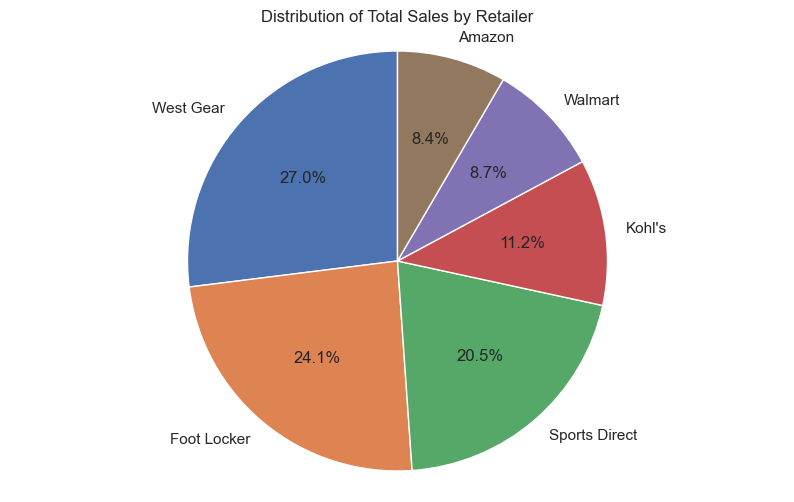

In [50]:
# Plot total sales by product
plt.pie(sales_retailer['total_sales'], labels=sales_retailer['retailer'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Sales by Retailer')
plt.axis('equal')
plt.show()

Out of all the retailers, "West Gear" has the highest total sales, making up around 27% of the total sales. Following closely behind is "Foot Locker" with approximately 24.1% of the total sales. "Sports Direct" contributes around 20.5% of the total sales, while "Kohl's" accounts for approximately 11.2% of the total sales. "Walmart" has a sales percentage of approximately 8.7% of the total sales, while "Amazon" has the lowest sales percentage at approximately 8.4% of the total sales. Overall, "West Gear" is the top-performing retailer in terms of sales contribution, while "Amazon" has the lowest sales percentage among all retailers.

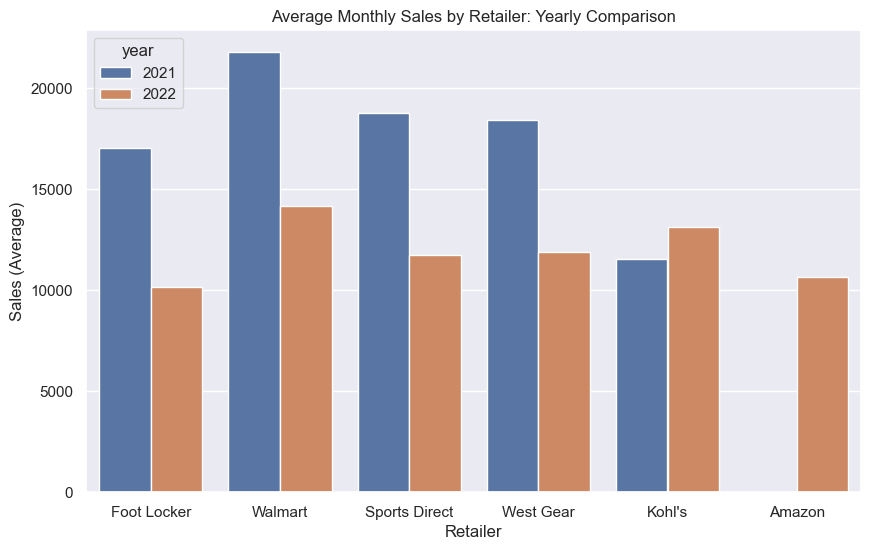

In [51]:
# Plot total sales by retailer
sns.barplot(x='retailer', y='sales', data=sales_df, hue='year', errorbar=None)
plt.xlabel("Retailer")
plt.ylabel("Sales (Average)")
plt.title("Average Monthly Sales by Retailer: Yearly Comparison")
plt.show()

In [52]:
# Correlation Matrix
correlation_matrix = sales_df[['sales','price_per_unit','units_sold']].corr()
correlation_matrix

,sales,price_per_unit,units_sold
sales,1.000000,0.539447,0.919304
price_per_unit,0.539447,1.000000,0.265660
units_sold,0.919304,0.265660,1.000000


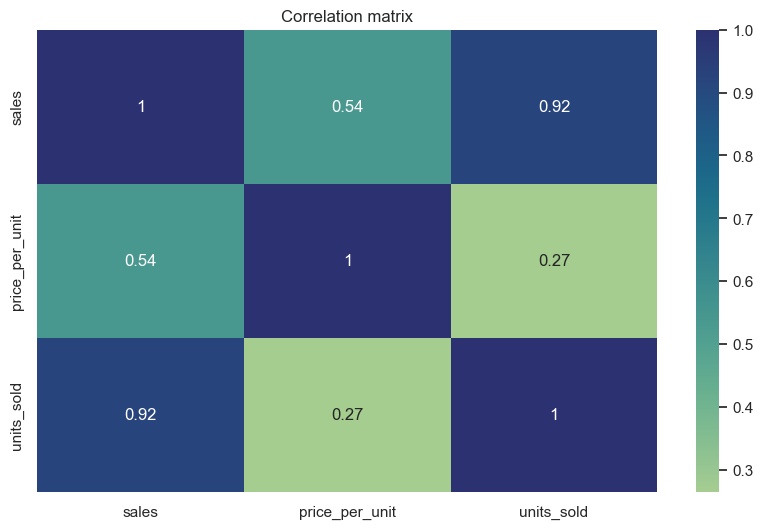

In [53]:
# Correlation plot
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation matrix')
plt.show()

The correlation between "sales" and "price_per_unit" is moderate (0.539), which means that as the price per unit increases, the total sales also tend to increase, and vice versa. On the other hand, the correlation between "sales" and "units_sold" is strong (0.919), indicating that there is a strong linear relationship between the total sales and the number of units sold. This means that when the number of units sold increases, the total sales also increase, and vice versa. Lastly, the correlation between "price_per_unit" and "units_sold" is weak (0.266), which suggests a minor linear relationship between the price per unit and the number of units sold. However, this relationship is relatively weaker compared to the other correlations.